In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
credit_card=pd.read_csv(r'C:\Users\Vijendra\Downloads\Paper2\credit_card.csv',header=0)
credit_card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
credit_card.shape

(8950, 18)

In [4]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
credit_card.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
#imputing numerical missing data with the mean value.

credit_card["CREDIT_LIMIT"].fillna(int(credit_card["CREDIT_LIMIT"].mean()),inplace=True)
print(credit_card.isnull().sum())


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [7]:
credit_card["MINIMUM_PAYMENTS"].fillna(int(credit_card["MINIMUM_PAYMENTS"].mean()),inplace=True)
print(credit_card.isnull().sum())


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


# b. Outlier Treatment using the Z-score method


In [8]:
credit_card.drop(['CUST_ID'], axis = 1,inplace=True)

In [9]:
credit_card.shape

(8950, 17)

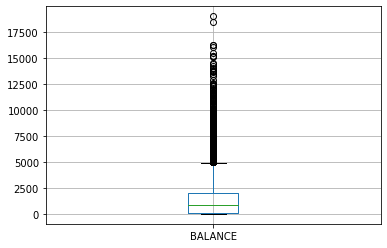

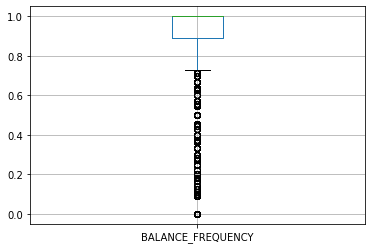

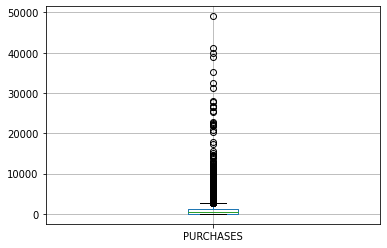

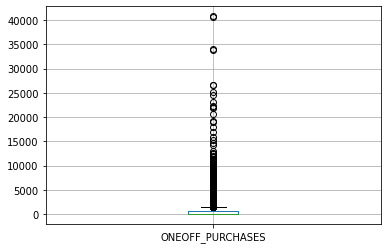

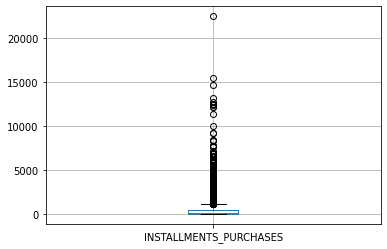

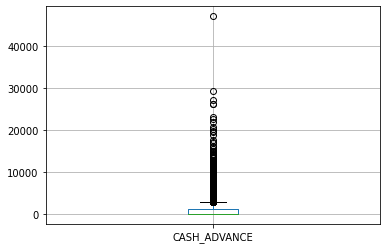

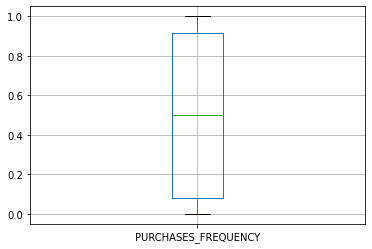

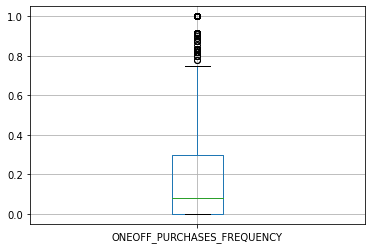

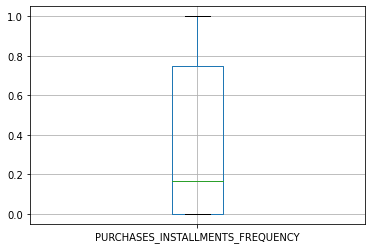

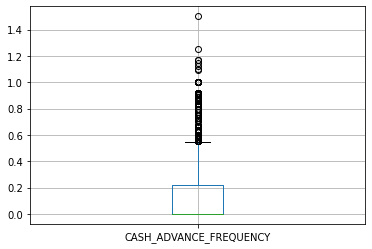

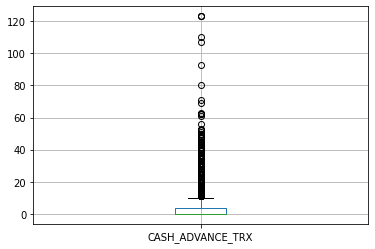

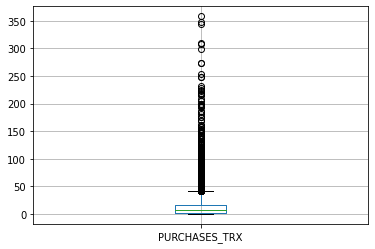

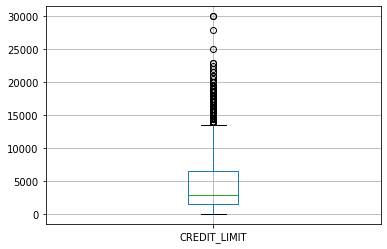

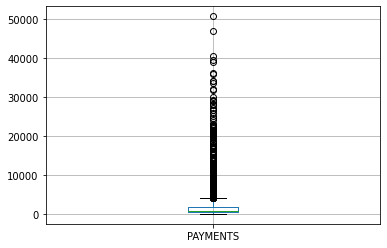

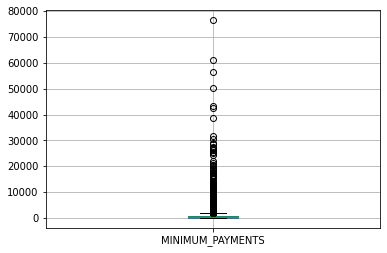

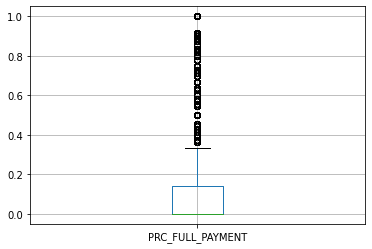

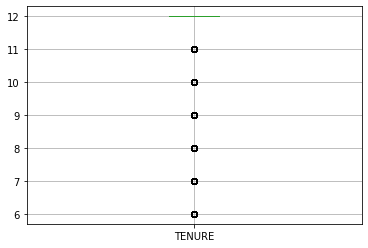

In [10]:
#Assumption 1: There should be no outlier in the data. Check using boxplot.

for i in credit_card.columns:
    credit_card.boxplot(column=i)
    plt.show()

In [11]:
credit_card.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# Detecting outliers

In [12]:
def outlier_percent(credit_card):
    Q1 = credit_card.quantile(0.25)
    Q3 = credit_card.quantile(0.75)
    IQR = Q3 - Q1
    lowerend = Q1 - (1.5 * IQR)
    upperend = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((credit_card < lowerend) |(credit_card > upperend))
    num_total = credit_card.count()
    return (num_outliers/num_total)*100

In [13]:
data = credit_card
for column in data.columns:
    credit_card = data[column]
    percent = str(round(outlier_percent(credit_card), 2))
    print(f'Outliers in "{column}": {percent}%')

Outliers in "BALANCE": 7.77%
Outliers in "BALANCE_FREQUENCY": 16.68%
Outliers in "PURCHASES": 9.03%
Outliers in "ONEOFF_PURCHASES": 11.32%
Outliers in "INSTALLMENTS_PURCHASES": 9.69%
Outliers in "CASH_ADVANCE": 11.51%
Outliers in "PURCHASES_FREQUENCY": 0.0%
Outliers in "ONEOFF_PURCHASES_FREQUENCY": 8.74%
Outliers in "PURCHASES_INSTALLMENTS_FREQUENCY": 0.0%
Outliers in "CASH_ADVANCE_FREQUENCY": 5.87%
Outliers in "CASH_ADVANCE_TRX": 8.98%
Outliers in "PURCHASES_TRX": 8.56%
Outliers in "CREDIT_LIMIT": 2.77%
Outliers in "PAYMENTS": 9.03%
Outliers in "MINIMUM_PAYMENTS": 8.65%
Outliers in "PRC_FULL_PAYMENT": 16.47%
Outliers in "TENURE": 15.26%


In [14]:
for column in data.columns:
    credit_card = data[column]
    
    Q1 = credit_card.quantile(0.25)
    Q3 = credit_card.quantile(0.75)
    IQR = Q3 - Q1
    lowerend = Q1 - (1.5 * IQR)
    upperend = Q3 + (1.5 * IQR)
    outliers = ((credit_card < lowerend) |(credit_card > upperend))
    data[column].loc[outliers] = np.nan
    
data.isna().sum()

BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         248
PAYMENTS                             808
MINIMUM_PAYMENTS                     774
PRC_FULL_PAYMENT                    1474
TENURE                              1366
dtype: int64

In [15]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imp_data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
imp_data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler

std_imp_data = pd.DataFrame(StandardScaler().fit_transform(imp_data), columns=imp_data.columns)
std_imp_data.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.0
mean,-8.211929e-17,3.173811e-16,-3.589556e-15,5.317460e-15,-6.345018e-16,5.996011e-16,-3.716084e-16,-5.842974e-15,2.353921e-16,-3.008890e-16,6.579405e-16,2.056704e-17,4.398009e-15,6.117763e-16,-5.816700e-16,-1.688860e-15,0.0
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,0.0
min,-9.680177e-01,-4.155617e+00,-9.106466e-01,-6.677800e-01,-7.878643e-01,-6.484089e-01,-1.221758e+00,-7.446057e-01,-9.169952e-01,-7.471713e-01,-6.814946e-01,-9.663389e-01,-1.363924e+00,-1.191693e+00,-1.156113e+00,-4.499756e-01,0.0
25%,-8.683056e-01,3.667004e-01,-8.518112e-01,-6.677800e-01,-7.878643e-01,-6.484089e-01,-1.014125e+00,-7.446057e-01,-9.169952e-01,-7.471713e-01,-6.814946e-01,-8.735738e-01,-8.646865e-01,-8.095000e-01,-7.778328e-01,-4.499756e-01,0.0
50%,-2.925597e-01,3.667004e-01,-3.751024e-01,-5.884461e-01,-4.760482e-01,-6.484089e-01,2.404259e-02,-3.780352e-01,-4.976286e-01,-7.471713e-01,-6.814946e-01,-3.169831e-01,-4.137624e-01,-3.381607e-01,-4.198647e-01,-4.499756e-01,0.0
75%,5.610651e-01,3.667004e-01,6.119130e-01,3.681906e-01,5.312755e-01,5.414602e-01,1.062211e+00,4.284251e-01,9.701506e-01,4.376567e-01,4.797164e-01,6.106681e-01,6.491302e-01,6.806684e-01,7.181124e-01,-2.122278e-01,0.0
max,2.871877e+00,3.667004e-01,3.123638e+00,3.516580e+00,3.313008e+00,3.340130e+00,1.269843e+00,2.554542e+00,1.599199e+00,3.130443e+00,3.189209e+00,2.837031e+00,3.000377e+00,2.973828e+00,3.050983e+00,4.304993e+00,0.0


# c. Deal with correlated variables

<AxesSubplot:>

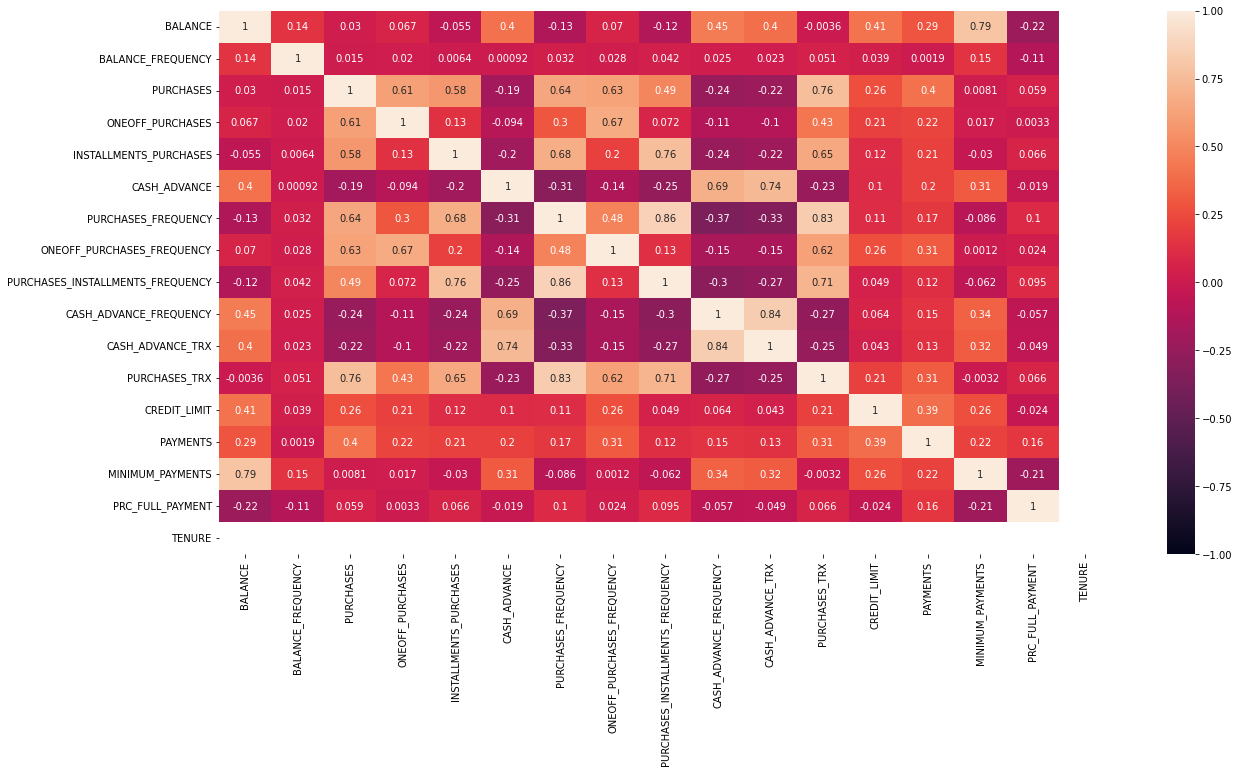

In [17]:
import seaborn as sns
corr_std_imp_data=std_imp_data.corr(method='pearson')
#print(corr_std_imp_data)
plt.figure(figsize=(20,10))

sns.heatmap(corr_std_imp_data,vmax=1.0,vmin=-1.0,annot=True)

In [18]:
#dropping the highly correlated variables that is CASH_ADVANCE_TRX,PURCHASES_TRX having corrrelation about 0.80,0.85
std_imp_data=std_imp_data.drop(['CASH_ADVANCE_TRX','PURCHASES_TRX'], axis=1)

# Q3. Perform dimensionality reduction using PCA such that the  95% of the variance is explained

In [19]:
from sklearn.decomposition import PCA
pca=PCA(n_components= 0.95)#to view the entire eigen vector
std_imp_data=pca.fit_transform(std_imp_data)
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

[0.28121145 0.20433835 0.10742873 0.09098477 0.06501593 0.06335487
 0.04737705 0.03932639 0.02788179 0.0222819  0.01958648]


# Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve

In [20]:
#!pip install yellowbrick

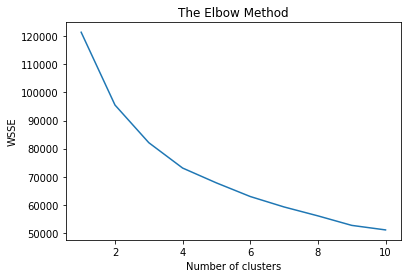

In [21]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wsse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,  random_state = 10)
    kmeans.fit(std_imp_data)
    wsse.append(kmeans.inertia_)
plt.plot(range(1, 11), wsse)
#plt.scatter(range(1, 11),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [22]:
print(wsse)

[121389.09845060598, 95504.49530102857, 82110.62581274108, 73092.78150486518, 67810.33696727917, 62966.53816604801, 59254.11116769577, 56089.10404724286, 52706.813932282515, 51092.59723835412]


In [23]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4,  random_state = 10)
Y_pred = kmeans.fit_predict(std_imp_data)

In [24]:
Y_pred

array([0, 3, 2, ..., 1, 0, 2])

In [25]:
kmeans.inertia_

73092.78150486518

In [26]:
kmeans.n_iter_

41

In [27]:
credit_card["Clusters"]=Y_pred
credit_card.head(10)

0    12.0
1    12.0
2    12.0
3    12.0
4    12.0
5    12.0
6    12.0
7    12.0
8    12.0
9    12.0
Name: TENURE, dtype: object

## Q5. Find the optimum value of k for k-means clustering using the silhouette score method and specify the number of observations in each cluster using a bar plot

In [28]:
from sklearn.metrics import silhouette_score

score = silhouette_score(std_imp_data, kmeans.labels_, metric='euclidean')

# Print the score

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.184


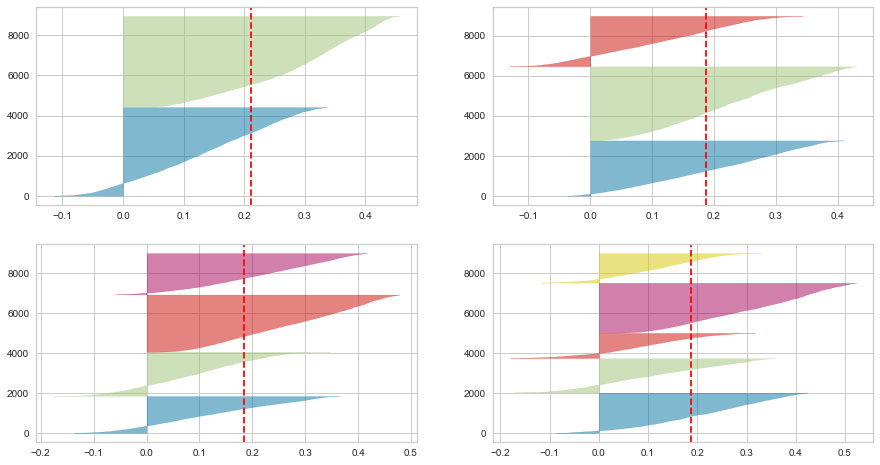

In [29]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(std_imp_data)

Here, the vertical dotted red line in this plot is the average score. It looks like our clustering method is good, since each cluster bumps out above the average, and the cluster scores look decent.